In [93]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint 

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [98]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

14

In [114]:
all_results = []

for city in cities:
    # Starting URL for Weather Map API Call
    url = "https://api.openweathermap.org/data/2.5/weather?" 

    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    
    try:
        response = requests.get(query_url).json()
        
#         temp_f_list = []
#         latitude_list = []
#         humidity_list = []
#         cloudiness_list = []
#         wind_speed_list = []

        temp_f = (response["main"]['temp'])
        latitude = (response["coord"]['lat'])
        humidity = (response["main"]['humidity'])
        cloudiness = (response["clouds"]['all'])
        wind_speed = (response["wind"]['speed'])
        
        temp_f_list.append(response["main"]['temp'])
        latitude_list.append(response["coord"]['lat'])
        humidity_list.append(response["main"]['humidity'])
        cloudiness_list.append(response["clouds"]['all'])
        wind_speed_list.append(response["wind"]['speed'])
        
        # create dataframe
        all_results = {"Temperature":temp_f_list,
                       "Latitude":latitude_list,
                       "Humidity":humidity_list,
                       "Cloudiness":cloudiness_list,
                       "WindSpeed":wind_speed_list}

    except KeyError:
        continue

    
   

In [115]:
#
weather_df = pd.DataFrame(all_results)

#
temperature = weather_df['Temperature']
latitude = weather_df['Latitude']
humidity= weather_df['Humidity']
cloudiness= weather_df['Cloudiness']
wind_speed= weather_df['WindSpeed']



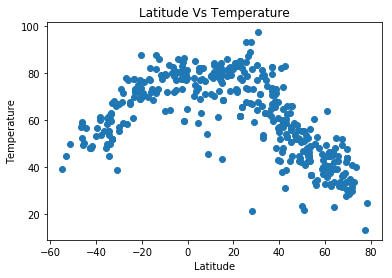

In [127]:
plt.scatter(latitude, temperature)
plt.title("Latitude Vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("output_data/comparisons/lat_temp.png")
plt.show()


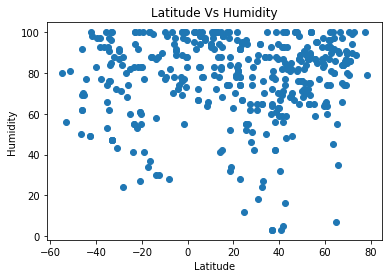

In [128]:
plt.scatter(latitude, humidity)
plt.title("Latitude Vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/comparisons/lat_humid.png")
plt.show()

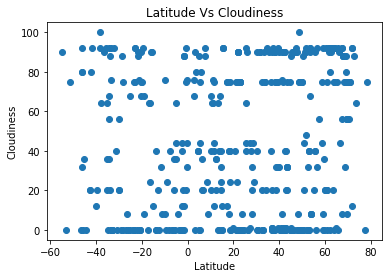

In [129]:
plt.scatter(latitude, cloudiness)
plt.title("Latitude Vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/comparisons/lat_cloud.png")
plt.show()

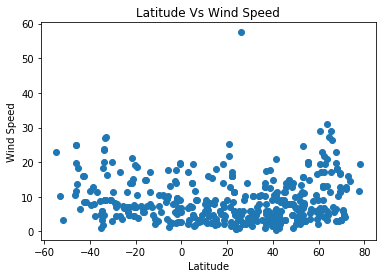

In [130]:
plt.scatter(latitude, wind_speed)
plt.title("Latitude Vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/comparisons/lat_wind.png")
plt.show()

In [121]:
# Export CSV file into Data Frame
weather_df.to_csv(output_data_file)
